In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
dt = pd.read_csv('babies.csv')
# This was to get specifically data related to the baby's birth weight 
baby_weight = dt[['case','bwt']]
print(baby_weight.bwt.describe())

count    1236.000000
mean      119.576861
std        18.236452
min        55.000000
25%       108.750000
50%       120.000000
75%       131.000000
max       176.000000
Name: bwt, dtype: float64


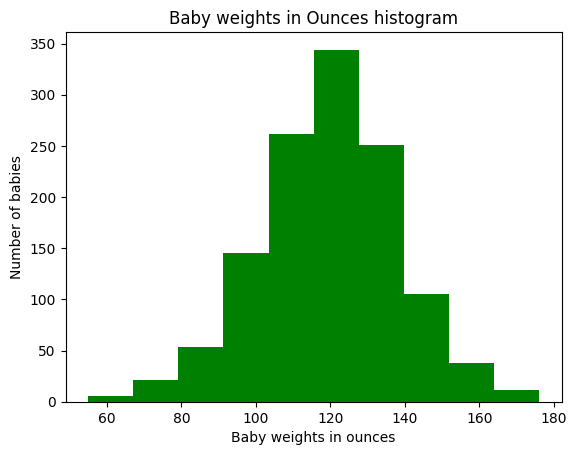

In [ ]:
# Before the Normal Distribution function is applied
plt.hist(baby_weight.bwt,color='green')
plt.xlabel('Baby weights in ounces')
plt.ylabel('Number of babies')
plt.title('Baby weights in Ounces histogram')
plt.show()

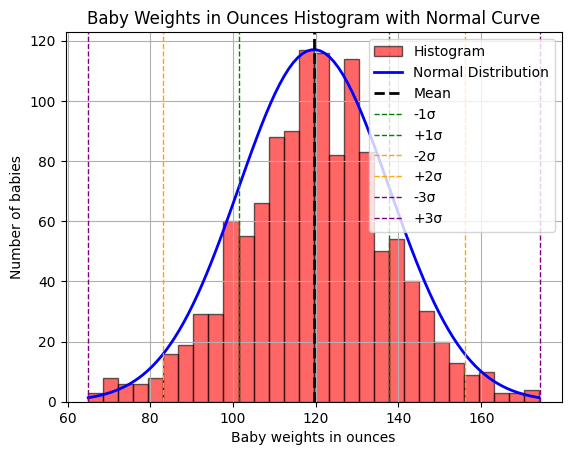

In [ ]:
mean_of_set = baby_weight.bwt.mean()
std = baby_weight.bwt.std()
clean_data = baby_weight.bwt[(baby_weight.bwt>(mean_of_set-3*std)) & (baby_weight.bwt<(mean_of_set+3*std)) ]
# This is the number of the weights that were outliers
#print(baby_weight.shape[0]-clean_data.shape[0])
x = np.linspace(clean_data.min(), clean_data.max(), 100)  # 100 points

# Normal distribution 
y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_of_set) / std) ** 2)

counts, bins, _ = plt.hist(clean_data, bins=30, color='red', alpha=0.6, edgecolor='black', density=False, label='Histogram')

y = y * max(counts) / max(y)

# Overlay the bell curve
plt.plot(x, y, color='blue', linewidth=2, label='Normal Distribution')
#Mean and Standard Deviation  Lines showing their own range
plt.axvline(mean_of_set, color='black', linestyle='dashed', linewidth=2, label='Mean')
# Standard deviation ranges
for i, color in zip([1, 2, 3], ['green', 'orange', 'purple']):
    plt.axvline(mean_of_set - i * std, color=color, linestyle='dashed', linewidth=1, label=f'-{i}σ')
    plt.axvline(mean_of_set + i * std, color=color, linestyle='dashed', linewidth=1, label=f'+{i}σ')

plt.xlabel('Baby weights in ounces')
plt.ylabel('Number of babies')
plt.title('Baby Weights in Ounces Histogram with Normal Curve')
plt.legend()
plt.grid(True)
plt.show()


 **IAN GANZA INSIGHTS**
 
  **Understanding Your Allocated Distribution & Its Comparisons**  

 **1️ Characteristics of Your Allocated Distribution**  

Your allocated distribution appears to be the **Normal Distribution (Gaussian Distribution)**. This is one of the most commonly occurring probability distributions in statistics.  

 ** Key Properties of the Normal Distribution**  

- **Bell-Shaped Curve:**  
  - The distribution is **symmetrical**, meaning values are evenly distributed around the mean.  
  - Most data points tend to be **close to the mean**, with fewer points as you move away from it.  

- **Defined by Three Key Statistics:**  
  1. **Mean (μ):** The central value where data tends to cluster.  
  2. **Standard Deviation (σ):** Measures how much variation exists from the mean. A small σ means data is tightly packed around the mean, while a large σ indicates more spread.  
  3. **Mean Absolute Deviation (MAD):** Measures the average absolute difference between each data point and the mean, providing another way to analyze variability.  

- **Follows the Empirical Rule (68-95-99.7 Rule):**  
  - **68%** of values fall within **1 standard deviation (μ ± 1σ)**.  
  - **95%** of values fall within **2 standard deviations (μ ± 2σ)**.  
  - **99.7%** of values fall within **3 standard deviations (μ ± 3σ)**.  

 

---

 **2️ How Does It Compare to Other Distributions?**  

Your normal distribution differs from several other probability distributions, each of which has its own unique behavior:  

| **Distribution**   | **Definition**  | **Key Characteristics** | **Example Use Cases** |
|-------------------|----------------|-------------------------|----------------------|
| **Normal**  | A **symmetrical bell curve** where most values cluster around the mean. | - Defined by **mean** and **standard deviation**.<br>- Values are **more likely** near the center.<br>- Empirical Rule applies. | - Heights of people.<br>- IQ scores.<br>- Stock market returns. |
| **Uniform**  | Every outcome is **equally likely** within a given range. | - Flat probability distribution.<br>- No clustering around a mean. | - Rolling a fair die.<br>- Selecting a random number between 0-1. |
| **Binomial**  | A distribution where an event has **two possible outcomes** (success/failure). | - Discrete probabilities.<br>- Governed by **number of trials (n)** and **success probability (p)**. | - Coin flips.<br>- Determining if a baby is of healthy weight (yes/no). |
| **Exponential**  | Models the **waiting time** until an event occurs. | - Asymmetric, **right-skewed**.<br>- The probability of an event **decreases** as time passes. | - Time between customer arrivals at a store.<br>- Time between earthquakes. |
| **Poisson**  | Models **how many times** an event occurs within a given time frame. | - Discrete, counts the number of events.<br>- Defined by **λ (average rate of occurrence)**. | - Number of customer calls per hour.<br>- Number of babies born per day. |



---

 **3️ Would Your Question Apply to Other Distributions?**  

Depending on the context, your question could be analyzed using **different distributions**:  

- **Poisson Distribution:**  
  - If the focus is on predicting **how many overweight or underweight babies** are born in a given time frame (e.g., per month), the Poisson distribution would be more appropriate.  

- **Exponential Distribution:**  
  - If the interest is in measuring the **waiting time between baby births**, the exponential distribution would be ideal.  
  - This applies to **time-based processes**, such as how long you wait before the next event occurs.  

- **Binomial Distribution:**  
  - If we want to classify a baby's health as **either “Healthy” (Success) or “Unhealthy” (Failure)** based on birth weight, a binomial distribution would be the right choice.  
  - This is because it only has **two possible outcomes**.  




Part 2: Bayesian Probability 

* $P(A|B)$ (Posterior Probability): The updated probability of event $A$ (hypothesis) given that event $B$ (evidence) has occurred
* $P(B|A)$ (Likelihood): The probability of observing evidence $B$ given that $A$ is true
* $P(A)$ (Prior Probability): The initial probability of $A$ before considering new evidence
* $P(B)$ (Marginal Probability / Evidence): The total probability of observing evidence $B$, regardless of whether $A$ is true or not

## Applying Bayes' Theorem to Fraud Detection

Let's assume we are developing a fraud detection system that flags suspicious transactions. We can use Bayesian probability to determine how likely a transaction is fraudulent given that it has been flagged by the system.

Using Bayes' Theorem:

$P(Fraud|Alert) = \frac{P(Alert|Fraud) \cdot P(Fraud)}{P(Alert)}$

Where:
* $P(Fraud)$ (Prior Probability): The probability that any given transaction is fraudulent before considering the alert system
* $P(Alert|Fraud)$ (Likelihood): The probability that a fraudulent transaction gets flagged by the system
* $P(Alert)$ (Evidence): The overall probability that any transaction is flagged

## Assumptions Based on Past Data

1. From past data, *2% of all transactions are fraudulent*:
   
   $P(Fraud) = 0.02$

2. If a transaction *is fraudulent, there's an **85% chance* it gets flagged:
   
   $P(Alert|Fraud) = 0.85$

3. If a transaction *is legitimate, there's a **5% chance* it still gets flagged as suspicious (false positive):
   
   $P(Alert|Not\;Fraud) = 0.05$

## Computing $P(Alert)$ using the Law of Total Probability

The total probability that a transaction is flagged is:

$P(Alert) = P(Alert|Fraud) \cdot P(Fraud) + P(Alert|Not\;Fraud) \cdot P(Not\;Fraud)$

Since $P(Not\;Fraud) = 1 - P(Fraud)$, we substitute:

$P(Alert) = (0.85 \times 0.02) + (0.05 \times 0.98)$

Using this, we can now compute the *posterior probability* $P(Fraud|Alert)$, which tells us how likely a transaction is fraudulent given that the system has flagged it.

---

This approach enables financial institutions to improve fraud detection, reducing false positives and ensuring better security for customers

The probability that the transaction is fraudulent given that it has been flagged by the system. (P(Fraud|Alert)) = 25.76%


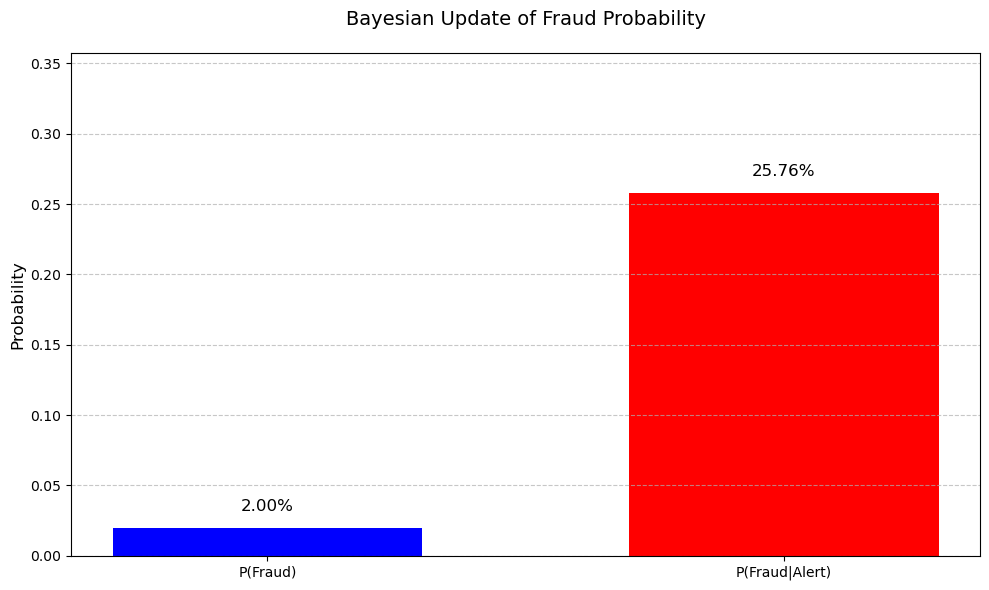

In [10]:
import math
import matplotlib.pyplot as plt

def validate_probability(p):
    """
    Validates if a value is a valid probability (between 0 and 1).
    
    Args:
        p (float): The probability value to validate
        
    Raises:
        ValueError: If probability is not between 0 and 1
    """
    if not 0 <= p <= 1:
        raise ValueError("Probability must be between 0 and 1")

def calculate_posterior_probability(p_fraud, p_alert_given_fraud, p_alert):
    """
    Calculates posterior probability using Bayes' theorem.
    
    Args:
        p_fraud (float): Prior probability P(Fraud)
        p_alert_given_fraud (float): Likelihood P(Alert|Fraud)
        p_alert (float): Total probability P(Alert)
        
    Returns:
        float: Posterior probability P(Fraud|Alert)
    """
    return (p_alert_given_fraud * p_fraud) / p_alert

def calculate_alert_probability(p_alert_given_fraud, p_fraud, p_alert_given_not_fraud, p_not_fraud):
    """
    Calculates total probability of alert using the law of total probability.
    
    Args:
        p_alert_given_fraud (float): P(Alert|Fraud)
        p_fraud (float): P(Fraud)
        p_alert_given_not_fraud (float): P(Alert|Not Fraud)
        p_not_fraud (float): P(Not Fraud)
        
    Returns:
        float: Total probability P(Alert)
    """
    return (p_alert_given_fraud * p_fraud) + (p_alert_given_not_fraud * p_not_fraud)

def format_percentage(value):
    """
    Formats a probability as a percentage string.
    
    Args:
        value (float): Probability value between 0 and 1
        
    Returns:
        str: Formatted percentage with 2 decimal places
    """
    return f"{round((value * 100), 2)}%"

def create_probability_chart(probabilities_to_compare, probability_values):
    """
    Creates a bar chart comparing probabilities.
    
    Args:
        probabilities_to_compare (list): Labels for the x-axis
        probability_values (list): Probability values to plot
    """
    plt.figure(figsize=(10, 6))
    
    # Create bar chart
    bars = plt.bar(probabilities_to_compare, probability_values, 
                   color=['blue', 'red'],
                   width=0.6)
    
    # Customize chart appearance
    plt.ylabel('Probability', fontsize=12)
    plt.title('Bayesian Update of Fraud Probability', fontsize=14, pad=20)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Set y-axis limits with padding
    plt.ylim(0, max(probability_values) + 0.1)
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height*100:.2f}%',
                 ha='center', va='bottom', fontsize=12)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Display the plot
    plt.show()

def main():
    """
    Main function to calculate and visualize fraud probability using Bayesian inference.
    """
    # Prior probabilities
    p_fraud = 0.02  # P(Fraud)
    p_not_fraud = 1 - p_fraud  # P(Not Fraud)
    
    # Conditional probabilities
    p_alert_given_fraud = 0.85  # P(Alert|Fraud)
    p_alert_given_not_fraud = 0.05  # P(Alert|Not Fraud)
    
    # Validate input probabilities
    validate_probability(p_fraud)
    
    # Calculate total probability of alert using law of total probability
    p_alert = calculate_alert_probability(
        p_alert_given_fraud, p_fraud, 
        p_alert_given_not_fraud, p_not_fraud
    )
    
    # Calculate posterior probability using Bayes' theorem
    p_fraud_given_alert = calculate_posterior_probability(
        p_fraud, p_alert_given_fraud, p_alert
    )
    
    # Format percentage for display
    formatted_percentage = format_percentage(p_fraud_given_alert)
    print(f"The probability that the transaction is fraudulent given that it has been flagged by the system. (P(Fraud|Alert)) = {formatted_percentage}")
    
    # Visualization
    probabilities_to_compare = ['P(Fraud)', 'P(Fraud|Alert)']
    probability_values = [p_fraud, p_fraud_given_alert]
    create_probability_chart(probabilities_to_compare, probability_values)

if __name__ == "__main__":
    main()

**Practical Significance of Bayesian Inference**

Bayesian inference is a method of updating probabilities as new information becomes available. It has numerous real-world applications and aids in making more informed decisions based on data.

Bayesian inference is widely employed in fields such as finance (for risk assessment), artificial intelligence (in machine learning), and security (for fraud detection). It offers a systematic approach to refine predictions and minimize errors.

A key strength of Bayesian inference lies in its ability to balance prior knowledge with new data. This prevents overreacting to incoming information by integrating it with existing knowledge. This feature is particularly valuable in applications like spam filtering, recommendation systems, and autonomous vehicles, where decisions must be dynamically adjusted.

Furthermore, it is used in adaptive learning. Unlike fixed probability methods, Bayesian inference continuously updates beliefs. This adaptability makes it suitable for situations where conditions evolve over time, such as weather forecasting or medical diagnoses.

**Examples of Applications**

* Medical Diagnosis: Updating the probability of a disease based on test results.
* Spam Filtering: Adjusting the likelihood of an email being spam as new data is received.
* Weather Forecasting: Refining predictions with new weather data.
* Machine Learning: Helping algorithms learn and improve over time.

**In the context of our fraud detection example:**

* **Updating Beliefs:**
    * Before checking an alert, we know that fraud is rare (only 2% chance). However, if a transaction is flagged, we update our belief using Bayes' theorem. Instead of relying only on the general fraud rate, we now consider how likely the alert is when fraud happens versus when it doesn’t.
* **Better Decision-Making:**
    * Without Bayesian inference, we might think every flagged transaction is highly suspicious. But using the theorem, we see that even if an alert is triggered, the probability of actual fraud might not be as high as we expect. This helps in reducing false alarms and focusing on real fraud cases.

### Gradient Descent in Code

**Step 1: Initialize given values**

We set up X and Y based on the given data points.

Initialize m = -1 and b = 1 (starting values).

Define learning_rate, though SciPy manages step sizes internally.

In [11]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Given data points
X = np.array([1, 3])
Y = np.array([3, 6])

# Initial values of m and b
initial_params = np.array([-1, 1])  # m = -1, b = 1

# Learning rate (not directly used in SciPy minimize but important conceptually)
learning_rate = 0.1


**Step 2: Define Mean Squares Error Function**

The function calculates the Mean Squared Error (MSE).

It computes predictions (y_pred) using y = mx + b.

The loss is calculated as the average squared error between actual (Y) and predicted (y_pred) values.

In [12]:
# Define the cost function (MSE)
def mse(params, X, Y):
    m, b = params
    y_pred = m * X + b
    return np.mean((Y - y_pred) ** 2)


**Step 3: Compute the gradient**

This function calculates the gradients (partial derivatives) for m and b.
*italicized text*
These gradients show how to adjust m and b to reduce error.

In [13]:
# Compute the gradient (partial derivatives of MSE)
def mse_gradient(params, X, Y):
    m, b = params
    y_pred = m * X + b
    error = Y - y_pred
    grad_m = (-2 / len(X)) * np.sum(error * X)
    grad_b = (-2 / len(X)) * np.sum(error)
    return np.array([grad_m, grad_b])


**Step 4: Store and track m and b over iterations**

We store m and b at each iteration.

The callback() function saves values every time minimize() updates them.



In [14]:
# Store the history of m and b values for visualization
m_history = []
b_history = []

# Callback function to store values during optimization
def callback(params):
    m_history.append(params[0])
    b_history.append(params[1])


**Step 5: Optimize m and b using SciPy**

**scipy.optimize.minimize():**

Minimizes mse() (cost function).

Uses BFGS method (gradient-based optimization).

jac=mse_gradient passes the gradient function.

Callback function stores m and b values.

**Extracts final m and b values after optimization.**

In [15]:
# Optimize using SciPy's minimize function
result = minimize(mse, initial_params, args=(X, Y), method='BFGS', jac=mse_gradient, callback=callback)

# Extract optimized values
m_opt, b_opt = result.x
print(f"Optimized values: m = {m_opt:.4f}, b = {b_opt:.4f}")


Optimized values: m = 1.5000, b = 1.5000


Step 6: Visualize how m and b change over iterations

keyboard_arrow_down
Plot m and b updates over iterations
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

Plot m updates
ax[0].plot(m_history, label="m values", marker='o', linestyle='-') ax[0].set_xlabel("Iteration") ax[0].set_ylabel("Value of m") ax[0].set_title("Evolution of m") ax[0].legend()

Plot b updates
ax[1].plot(b_history, label="b values", marker='o', linestyle='-') ax[1].set_xlabel("Iteration") ax[1].set_ylabel("Value of b") ax[1].set_title("Evolution of b") ax[1].legend()

plt.show()

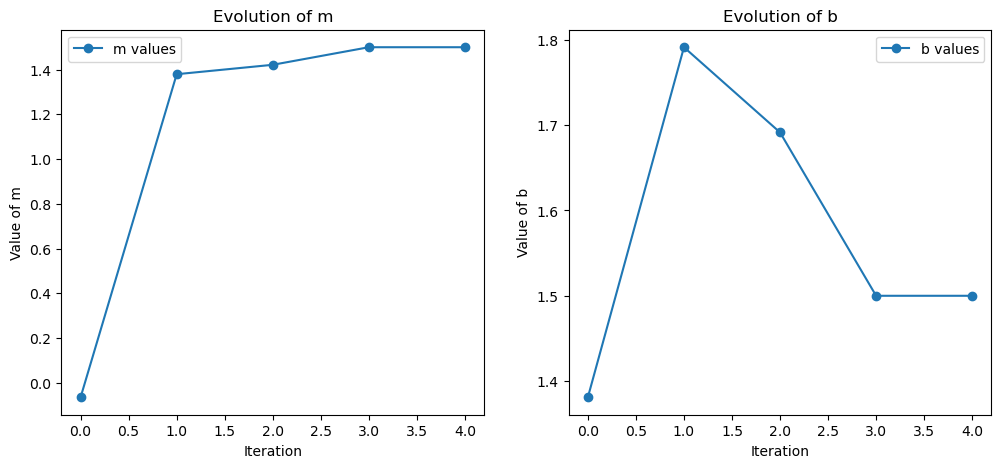

In [16]:
# Plot m and b updates over iterations
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot m updates
ax[0].plot(m_history, label="m values", marker='o', linestyle='-')
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Value of m")
ax[0].set_title("Evolution of m")
ax[0].legend()

# Plot b updates
ax[1].plot(b_history, label="b values", marker='o', linestyle='-')
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("Value of b")
ax[1].set_title("Evolution of b")
ax[1].legend()

plt.show()

Step 7: Final Regression line visualization

Plots the original data points.

Draws the final regression line using m_opt and b_opt.

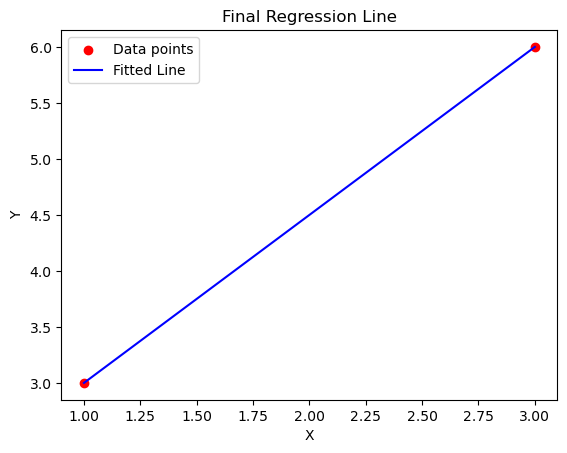

In [17]:
# Plot the final regression line
plt.scatter(X, Y, label="Data points", color="red")
plt.plot(X, m_opt * X + b_opt, label="Fitted Line", color="blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Final Regression Line")
plt.show()


In [18]:
# from IPython.display import Image
# print("COMMIT LOG")
# Image("img/commit_image_2.png")

![title](img/picture.png)

zsh:1: unknown file attribute: i


# Commit log using git log --author="Name" 


1. Jeremiah Agbaje
"-commit 797720a0113a598a3573b15414683f1705e12e54 (HEAD -> main, origin/main)
Author: j-agbaje <144043288+j-agbaje@users.noreply.github.com>
Date:   Sun Feb 23 21:34:42 2025 +0200

    Update graphs in Gradient descent

commit b0bf7b31d4f3f8e731fd7906da64ba82d10b8f45
Author: j-agbaje <144043288+j-agbaje@users.noreply.github.com>
Date:   Sun Feb 23 20:30:05 2025 +0200

    Add explanation on Bayesian Inference

commit 35f1147eb79b5bfbb723f178dc5291e156d3ce1f
Author: j-agbaje <144043288+j-agbaje@users.noreply.github.com>
Date:   Sun Feb 23 20:24:12 2025 +0200"



2. Ian Ganza
commit 18d2a65968fd527d2ecfdbb3c0c0b83ad3a14e12
Author: Ian Ganza <144003894+i-ganza007@users.noreply.github.com>
Date:   Sun Feb 23 19:37:04 2025 +0200

    Add the presentation notebook
    
    Added the super notebook which everyone will add to , adding the answer to the normal distribution question

commit fad6ecb59010cb5f60e5519d9f5c374fe0b5d35e
Author: Ian Ganza <144003894+i-ganza007@users.noreply.github.com>
Date:   Sat Feb 22 22:38:13 2025 +0200

 Upload the babies csv & Add the normal distribution file


3. Eddy Gasana

commit 26f6173dd0ac67f1f7455ff9828bc9a58f1e7a5a
Author: angelo54425 <e.gasana@alustudent.com>
Date:   Sun Feb 23 21:07:05 2025 +0200

    Gradient Descent Manual Computation for Simple Linear Regression with SciPy optimization


4. Nelly IYABIKOZE

commit 4dc35e86391bbf25aa96a3ef9fb1a26847ca2d4c
Author: nellyiya <n.iyabikoze@alustudent.com>
Date:   Sun Feb 23 20:06:58 2025 +0200

    Added report insights to norm_distr.ipynb

commit a999c37277847eba3c5ee7f983e29ceed727db99
Author: nellyiya <n.iyabikoze@alustudent.com>
Date:   Sun Feb 23 19:52:09 2025 +0200

     Added Python script to calculate fraud probability

5.  Nicolle Marizani

commit ec7d0bb3108833675b5331d19f3f055c6ca83630
Author: NicolleNM <138711504+NicolleNM@users.noreply.github.com>
Date:   Sun Feb 23 21:15:18 2025 +0200

    Visualisation for iterations and regressions







# Short Paragraph summary


# Jeremiah Agbaje

I learned about Bayes’ theorem and the concepts of prior, posterior, marginal probability, and likelihood in Bayes’ theorem. Bayes’ theorem is used to determine the probability of a possible event occurring (hypothesis) when another event (evidence) occurs. I learned about Bayesian inference, which is a method of updating probabilities using Bayes’ theorem as new information becomes available. In line with that, I learned how Bayesian inference is used in various fields like medical diagnosis, fraud detection, and spam filtering. This opened my understanding of how prior knowledge, from which we derive prior probabilities, is used to help new evidence refine probabilities to make predictions more accurate. With more accurate predictions, we can make better decisions—for example, a doctor making a more accurate diagnosis of a disease based on the probability that a patient has the disease if a certain test was passed—in various real-world applications. Studying Bayesian probabilities showed me that probabilities continually update depending on new information rather than being static mathematical values.





# Nicolle Marizani

More Iterations = Better Results
Instead of stopping after just three updates, SciPy keeps going until the error is as small as possible. This helps us get a more accurate model.

Final Line = A Good Fit
After running the optimization, the line follows the data points closely, meaning the model has learned the trend well.

# Eddy Gasana 

I personally learnt a lot from this assignment but to be more specific I was more interested in how Bayesian probability works. I learnt that it is a type of probability that is based off more on what is most likely to happen rather than what occurs often. So the way it works is by normally showcasing the most likely output and then based on the additional information we get we reinforce our belief of that output being true or we receive proof of the increase in the likelihood of another output.

# Nelly Iyabikoze


The insights I got from Bayesian probability is that you can update beliefs with new data like you can update prior beliefs based on the new data,Bayesian improve predictions by making them ideal for situations.The mathematical foundation of Bayesian probability uses Bayes’ theorem, which is expressed as:
\[ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} \]

Also I learned about the Scipy library used for scientific and technical computing and modular and dry principle (its don't repeat yourself)which helps to improve code structure,maintainability and readability.Working on this assignment has been an incredibly valuable learning experience. It not only deepened my understanding of the subject but also helped me apply theoretical concepts to practical scenarios.

# Ian Ganza’s Insights 

Normal Distribution depends on mean or standard deviation , which means you can likely predict how often an outcome is likely to occur . Since most of the occurrences happen near the mean , any exception is an outlier or one can say extraordinary . Forexample when predicting IQ and the mean IQ is 100 , when someone has an IQ of 54 or 180 , this means that this is extremely rare . To cut down on useless training data , we can use normal distribution but we are making a trade off on losing data . This can only be used in scenarios where the outliers are extremely rare .